# Pythagorean Expectation and the Indian Premier League

The Indian Premier League (IPL) is the biggest cricket competition in the world, which has all of the world's best players in an eight week tournament involving eight teams playing sixty games in total. Each team plays every other team, once at home and then away, and the competition finishes with the four best teams competing in semi-finals and then a final.  

Cricket, like baseball, is a bat and ball game, where teams score runs and the team scoring the highest number of runs is the winner. There are, of course, many differences, but statistically speaking, we can generate the same Pythagorean statistic that we generated for baseball. Our data here is derived from the competition that took place in 2018.

The IPL is played in the T20 format, in which each team has up to 120 balls to score as many runs as they can (the game takes less than three hours to complete). One difference from baseball is that runs are much easier to score - in the IPL an average score is 170 runs - and outs (wickets) are much more costly - each team has only ten outs(called wickets) in the entire game, and if you run out of wickets before the 120 balls have been bowled (pitched) then your inning is over.

With this background, let's construct the Pythagorean Expectation for the IPL in 2018.

In [1]:
# As with the previous notebook, we first important the packages we will need to process the data.

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Now we import the data, which comes in the form of a list of games played in the 2018 season.
# We print out the list of variables names in the dataframe

IPL18 = pd.read_excel('IPL2018teams.xlsx')
print(IPL18.columns.tolist())

['scorecard_id', 'start_date', 'phase', 'name', 'home_team', 'away_team', 'toss_winner', 'toss_decision', 'inn1team', 'innings1', 'wickets1', 'overs1', 'closure1', 'innings2', 'wickets2', 'overs2', 'closure2', 'adjusted_target_indicator', 'adjusted_target', 'team1_overs', 'team2_overs', 'mom_player_id', 'mom_player', 'scoring_status', 'result_type', 'result_margin', 'winning_team']


In [3]:
# We can see what our dataframe looks like simply by typing its name:

IPL18

,scorecard_id,start_date,phase,name,home_team,away_team,toss_winner,toss_decision,inn1team,innings1,...,adjusted_target_indicator,adjusted_target,team1_overs,team2_overs,mom_player_id,mom_player,scoring_status,result_type,result_margin,winning_team
0,1056637,2018-04-07,NaN,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,Chennai Super Kings,f,Mumbai Indians,165,...,n,0,20.0,20,44613,DJ Bravo,live bbb,ww,1,Chennai Super Kings
1,1056638,2018-04-08,NaN,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,f,Delhi Daredevils,166,...,n,0,20.0,20,170187,KL Rahul,live bbb,ww,6,Kings XI Punjab
2,1056639,2018-04-08,NaN,"Eden Gardens, Kolkata",Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,f,Royal Challengers Bangalore,176,...,n,0,20.0,20,412485,N Rana,live bbb,ww,4,Kolkata Knight Riders
3,1056640,2018-04-09,NaN,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Sunrisers,Rajasthan Royals,Sunrisers,f,Rajasthan Royals,125,...,n,0,20.0,20,15627,S Dhawan,live bbb,ww,9,Sunrisers
4,1056641,2018-04-10,NaN,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,f,Kolkata Knight Riders,202,...,n,0,20.0,20,119895,SW Billings,live bbb,ww,5,Chennai Super Kings
5,1056642,2018-04-11,NaN,"Sawai Mansingh Stadium, Jaipur",Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,f,Rajasthan Royals,153,...,y,71,17.5,6,218180,SV Samson,live bbb,wr,10,Rajasthan Royals
6,1056643,2018-04-12,NaN,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Sunrisers,Mumbai Indians,Sunrisers,f,Mumbai Indians,147,...,n,0,20.0,20,1738090,Rashid Khan,live bbb,ww,1,Sunrisers
7,1056644,2018-04-13,NaN,"M Chinnaswamy Stadium, Bangalore",Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,f,Kings XI Punjab,155,...,n,0,20.0,20,356989,UT Yadav,live bbb,ww,4,Royal Challengers Bangalore
8,1056645,2018-04-14,NaN,"Wankhede Stadium, Mumbai",Mumbai Indians,Delhi Daredevils,Delhi Daredevils,f,Mumbai Indians,194,...,n,0,20.0,20,157435,JJ Roy,live bbb,ww,7,Delhi Daredevils
9,1056646,2018-04-14,NaN,"Eden Gardens, Kolkata",Kolkata Knight Riders,Sunrisers,Sunrisers,f,Kolkata Knight Riders,138,...,n,0,20.0,20,1073273,B Stanlake,live bbb,ww,5,Sunrisers


In [4]:
# This cell compelete a number tasks. First we identify when the home team is the winning team, and when the visiting team 
# is the winner. Next we identify the runs scored by the home team and the away team (note: unlike baseball, where there are
# nine innings for each team, in T20 cricket each team gets only one inning, and once the first completes its inning, the opposing
# team has its inning). Finally, we include a counter which we can add up to give total number of games for each team.

IPL18['hwin']= np.where(IPL18['home_team']==IPL18['winning_team'],1,0)
IPL18['awin']= np.where(IPL18['away_team']==IPL18['winning_team'],1,0)
IPL18['htruns']= np.where(IPL18['home_team']==IPL18['inn1team'],IPL18['innings1'],IPL18['innings2'])
IPL18['atruns']= np.where(IPL18['away_team']==IPL18['inn1team'],IPL18['innings1'],IPL18['innings2'])
IPL18['count']=1


In [5]:
# Now we use a .groupby command to aggregate the performance of home teams during the season. Compare back to the MLB notebook
# to see how similar the commands are.

IPLhome = IPL18.groupby('home_team')['count','hwin', 'htruns','atruns'].sum().reset_index()
IPLhome = IPLhome.rename(columns={'home_team':'team','count':'Ph','htruns':'htrunsh','atruns':'atrunsh'})
IPLhome

<ipython-input-5-7e39ac425b82>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  IPLhome = IPL18.groupby('home_team')['count','hwin', 'htruns','atruns'].sum().reset_index()


,team,Ph,hwin,htrunsh,atrunsh
0,Chennai Super Kings,9,8,1577,1486
1,Delhi Daredevils,7,4,1258,1122
2,Kings XI Punjab,7,4,1188,1202
3,Kolkata Knight Riders,9,5,1468,1417
4,Mumbai Indians,7,3,1194,1171
5,Rajasthan Royals,7,5,1120,994
6,Royal Challengers Bangalore,7,4,1298,1286
7,Sunrisers,7,5,1070,1050


In [6]:
# Now we aggregate the performance of away teams in a different df.

IPLaway = IPL18.groupby('away_team')['count','awin', 'htruns','atruns'].sum().reset_index()
IPLaway = IPLaway.rename(columns={'away_team':'team','count':'Pa','htruns':'htrunsa','atruns':'atrunsa'})
IPLaway

<ipython-input-6-eb0607d2e7a1>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  IPLaway = IPL18.groupby('away_team')['count','awin', 'htruns','atruns'].sum().reset_index()


,team,Pa,awin,htrunsa,atrunsa
0,Chennai Super Kings,7,3,1264,1232
1,Delhi Daredevils,7,1,1265,1085
2,Kings XI Punjab,7,2,1124,1022
3,Kolkata Knight Riders,7,4,1326,1291
4,Mumbai Indians,7,3,1111,1186
5,Rajasthan Royals,8,2,1362,1237
6,Royal Challengers Bangalore,7,2,1097,1024
7,Sunrisers,10,5,1624,1651


In [7]:
# how we merge the two dfs to obtain a full record for each team across the season.

IPL18 = pd.merge(IPLhome, IPLaway, on = ['team'])
IPL18

,team,Ph,hwin,htrunsh,atrunsh,Pa,awin,htrunsa,atrunsa
0,Chennai Super Kings,9,8,1577,1486,7,3,1264,1232
1,Delhi Daredevils,7,4,1258,1122,7,1,1265,1085
2,Kings XI Punjab,7,4,1188,1202,7,2,1124,1022
3,Kolkata Knight Riders,9,5,1468,1417,7,4,1326,1291
4,Mumbai Indians,7,3,1194,1171,7,3,1111,1186
5,Rajasthan Royals,7,5,1120,994,8,2,1362,1237
6,Royal Challengers Bangalore,7,4,1298,1286,7,2,1097,1024
7,Sunrisers,7,5,1070,1050,10,5,1624,1651


In [8]:
# We now aggregate the home and away data for wins, games played and runs

IPL18['W'] = IPL18['hwin']+IPL18['awin']
IPL18['G'] = IPL18['Ph']+IPL18['Pa']
IPL18['R'] = IPL18['htrunsh']+IPL18['atrunsa']
IPL18['RA'] = IPL18['atrunsh']+IPL18['htrunsa']
IPL18

,team,Ph,hwin,htrunsh,atrunsh,Pa,awin,htrunsa,atrunsa,W,G,R,RA
0,Chennai Super Kings,9,8,1577,1486,7,3,1264,1232,11,16,2809,2750
1,Delhi Daredevils,7,4,1258,1122,7,1,1265,1085,5,14,2343,2387
2,Kings XI Punjab,7,4,1188,1202,7,2,1124,1022,6,14,2210,2326
3,Kolkata Knight Riders,9,5,1468,1417,7,4,1326,1291,9,16,2759,2743
4,Mumbai Indians,7,3,1194,1171,7,3,1111,1186,6,14,2380,2282
5,Rajasthan Royals,7,5,1120,994,8,2,1362,1237,7,15,2357,2356
6,Royal Challengers Bangalore,7,4,1298,1286,7,2,1097,1024,6,14,2322,2383
7,Sunrisers,7,5,1070,1050,10,5,1624,1651,10,17,2721,2674


In [9]:
# The last step in organizing the data is to create variables for win percentage (wpc) and the Pythagorean Expectation (pyth).

IPL18['wpc'] = IPL18['W']/IPL18['G']
IPL18['pyth'] = IPL18['R']**2/(IPL18['R']**2 + IPL18['RA']**2)
IPL18

,team,Ph,hwin,htrunsh,atrunsh,Pa,awin,htrunsa,atrunsa,W,G,R,RA,wpc,pyth
0,Chennai Super Kings,9,8,1577,1486,7,3,1264,1232,11,16,2809,2750,0.687500,0.510612
1,Delhi Daredevils,7,4,1258,1122,7,1,1265,1085,5,14,2343,2387,0.357143,0.490698
2,Kings XI Punjab,7,4,1188,1202,7,2,1124,1022,6,14,2210,2326,0.428571,0.474444
3,Kolkata Knight Riders,9,5,1468,1417,7,4,1326,1291,9,16,2759,2743,0.562500,0.502908
4,Mumbai Indians,7,3,1194,1171,7,3,1111,1186,6,14,2380,2282,0.428571,0.521012
5,Rajasthan Royals,7,5,1120,994,8,2,1362,1237,7,15,2357,2356,0.466667,0.500212
6,Royal Challengers Bangalore,7,4,1298,1286,7,2,1097,1024,6,14,2322,2383,0.428571,0.487037
7,Sunrisers,7,5,1070,1050,10,5,1624,1651,10,17,2721,2674,0.588235,0.508711


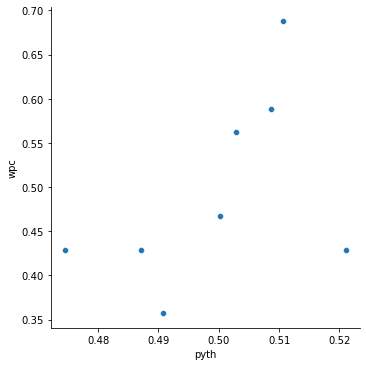

In [10]:
# Having prepared the data, we are now ready to examine it. First, we generate and xy plot use the Seaborn package.
# Unlike the MLB case, we can see that there is a very weak correlation between win percentage and the Pythagorean Expectation.

sns.relplot(x="pyth", y="wpc", data =IPL18)

## Self test

run sns.relplot again, but this time write y="W" instead of y="wpc". What do you find? Does it make a difference?

# Running a regression

We now run the same regression as we did for the MLB data: 

wpc = Intercept + coef x pyth

This time, while coefficient on pyth is positive - implying that a higher Pythagorean Expectation leads to a large win percentage, the standard error is also very large, and the t statistic of 1.353 implies a p-value of 0.225- well above the usual threshold of 0.050, which means that the coefficient estimate is in fact insignificantly different from zero. 

In [11]:
pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=IPL18).fit()
pyth_lm.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     1.830
Date:                Fri, 17 Dec 2021   Prob (F-statistic):              0.225
Time:                        07:45:06   Log-Likelihood:                 7.9710
No. Observations:                   8   AIC:                            -11.94
Df Residuals:                       6   BIC:                            -11.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2807      1.312     -0.976      0.367      -4.491       1.929
pyth           3.5522      2.626      1.353      0.225      -2.872       9.977
==============================================================================
Omnibus:                        0.002   Durbin-Watson:                   2.254
Prob(Omnibus):                  0.999   Jarque-Bera (JB):                0.217
Skew:                           0.014   Prob(JB):                        0.897
Kurtosis:                       2.193   Cond. No.                         89.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Self test

Run the regression above but instead write 'wpc ~ W' instead of 'wpc ~ pyth' in the line starting pyth_lm. What difference does this make?

# Conclusion

Why did the Pythagorean model produce a good fit for the baseball data but not for the cricket data? An obvious explanation is that there is some difference between the two sports which makes the model appropriate for one but not the other. For example, in cricket, the team batting second need only score one more run than the opponent to win, and so the inning ends if it reaches this milestone. If the team batting second is the winning team, then the gap in the scores will be small. However, if the team batting first can get all ten wickets cheaply, then the gap in scores could be very large. In our data the average runs difference when the team batting second won was 2, and when the team batting first won was 30. This might explain why the Pythagorean Expectation is not a good guide to winning in the IPL.

But there could be more basic statistical explanations. For MLB we had averages for 30 teams, each of which played about 160 games. Random variations are likely to be smoothed out when analyzing data on this scale. For the IPL we had only 8 teams, most of whom played only 14 games - so there is a much greater chance that random variations could have overwhelmed the Pythagorean model if it were correct.

Anyone interested in pursuing this further, might try two things. First, analyze games where the winning team bats first or second separately. Second, find data covering more seasons (not difficult to find online) in order to generate a much larger sample.

For now, however, we are going to move on and look at another sport: basketball.



